In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Estuarine_Crocodile.csv')
df.head()

,Species,CommonName,HeadLength,BodyLength
0,Crocodylus porosus,Estuarine Crocodile,24,161
1,Crocodylus porosus,Estuarine Crocodile,24,179
2,Crocodylus porosus,Estuarine Crocodile,32,226
3,Crocodylus porosus,Estuarine Crocodile,35,259
4,Crocodylus porosus,Estuarine Crocodile,40,287


Find the correlation between the head length and the body length

In [3]:
df['BodyLength'].corr(df['HeadLength'])

0.9898911439276338

In [4]:
df.corr()

,HeadLength,BodyLength
HeadLength,1.000000,0.989891
BodyLength,0.989891,1.000000


Make a scatter plot:

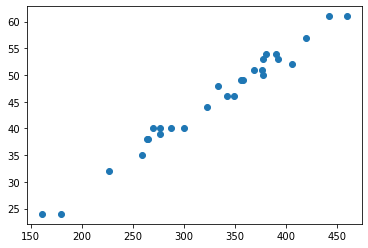

In [5]:
plt.scatter(x=df['BodyLength'], y=df['HeadLength'])

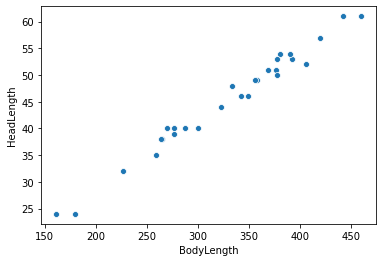

In [6]:
sns.scatterplot(x=df['BodyLength'], y=df['HeadLength'])

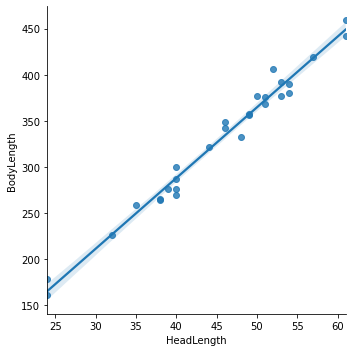

In [7]:
sns.lmplot(data=df, x='HeadLength', y='BodyLength')

# the lm plot with seaborn shows not ony a scatter plot,
# but also fits a line through the data points by using the OLS criteria
# and minimizes the sum of squared errors!! 

### Linear Regression

statsmodels

In [8]:
X = df['HeadLength']
Y = df['BodyLength']

statsmodels has this peculiarity where you HAVE to add the constant before you fit your model. It's silly, but how the package is made. Don't forget!!

In [9]:
X = sm.add_constant(X)
print(X)

# this essentially forces our lin reg model to add a constant so that 
# the line of best fit isn't forced to start at the origin(0,0) which wouldn't be a good fit

    const  HeadLength
0     1.0          24
1     1.0          24
2     1.0          32
3     1.0          35
4     1.0          40
5     1.0          40
6     1.0          46
7     1.0          48
8     1.0          52
9     1.0          61
10    1.0          51
11    1.0          54
12    1.0          38
13    1.0          46
14    1.0          38
15    1.0          49
16    1.0          39
17    1.0          49
18    1.0          40
19    1.0          53
20    1.0          61
21    1.0          53
22    1.0          44
23    1.0          54
24    1.0          50
25    1.0          57
26    1.0          40
27    1.0          51


we want Y = mx + b
statsmodels does: Y = mx
    
statsmodels for each variable will give coefficient, but no intercept!

If I have X, Y
statsmodels does: Y = mX + nZ

So we need a trick:
    Z = 1. 
    
 Y = mX + n*1  == mX + n (or essentially mX + b)

In [10]:
model = sm.OLS(Y, X)
# first dependent var, then independent var

print(model)

In [11]:
# now FIT the model to get results:
# fit the line to minimize the sum of sqrd. errors

results = model.fit()
print(results)

In [12]:
results.summary()

# intercept given as parameter "const" (constant): -18.2740
# slope given as coefficient of "HeadLength" below: 7.6601

# Y = (-18.27) + 7.66*X (+ error)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BodyLength   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1267.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.38e-23
Time:                        19:55:13   Log-Likelihood:                -105.32
No. Observations:                  28   AIC:                             214.6
Df Residuals:                      26   BIC:                             217.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2740      9.966     -1.834      0.078     -38.760       2.212
HeadLength     7.6601      0.215     35.588      0.000       7.218       8.103
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.597
Skew:                           0.323   Prob(JB):                        0.742
Kurtosis:                       2.693   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# note above: R-squared (0.98) says that:
# 98% of the variation in the data can be explained by the model!

In [14]:
results.predict(X)

0     165.568483
1     165.568483
2     226.849320
3     249.829634
4     288.130157
5     288.130157
6     334.090785
7     349.410995
8     380.051413
9     448.992355
10    372.391309
11    395.371623
12    272.809948
13    334.090785
14    272.809948
15    357.071099
16    280.470053
17    357.071099
18    288.130157
19    387.711518
20    448.992355
21    387.711518
22    318.770576
23    395.371623
24    364.731204
25    418.351937
26    288.130157
27    372.391309
dtype: float64

In [15]:
Y

0     161
1     179
2     226
3     259
4     287
5     300
6     342
7     333
8     406
9     459
10    376
11    380
12    265
13    349
14    264
15    358
16    276
17    356
18    270
19    392
20    442
21    377
22    322
23    390
24    377
25    419
26    276
27    368
Name: BodyLength, dtype: int64

In [16]:
# compare the actual Y number (e.g. 161), and the X prediction (e.g. 165.57)
# to calculate your error terms in practice, or residuals!!!

In [17]:
Y_pred = results.predict(X)

In [18]:
residuals = Y - Y_pred

In [19]:
residuals

0     -4.568483
1     13.431517
2     -0.849320
3      9.170366
4     -1.130157
5     11.869843
6      7.909215
7    -16.410995
8     25.948587
9     10.007645
10     3.608691
11   -15.371623
12    -7.809948
13    14.909215
14    -8.809948
15     0.928901
16    -4.470053
17    -1.071099
18   -18.130157
19     4.288482
20    -6.992355
21   -10.711518
22     3.229424
23    -5.371623
24    12.268796
25     0.648063
26   -12.130157
27    -4.391309
dtype: float64

In [20]:
np.mean(residuals**2)

# this is your mean squared error!
# the lower the better, this would be a pretty high error.

108.3283270759337

In [21]:
np.sqrt(np.mean(residuals**2))

# RMSE 
# adjusts for the fact that you squared it.
# this is the RMSE (root mean square error), adjusted to be on the same scale as the data.

10.408089501725746

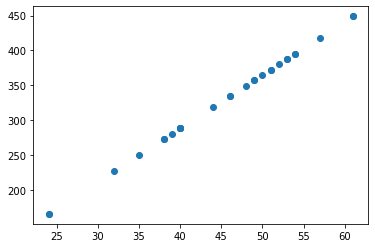

In [22]:
plt.plot(X['HeadLength'], Y_pred, 'o')
# perfectly in line because that is the whole point of making the predictions in the first place!

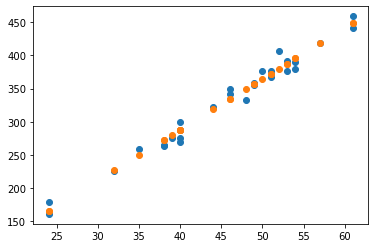

In [23]:
plt.plot(X['HeadLength'], Y, 'o')
plt.plot(X['HeadLength'], Y_pred, 'o')

# compare the predited values and the actual values (here in blue)

In [24]:
# The difference between the predicted values and actual values is exactly the residuals that you calculated!!

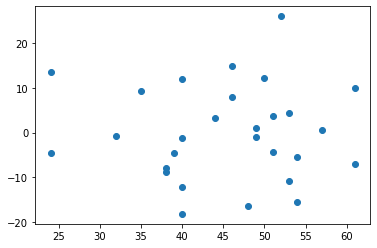

In [25]:
plt.plot(X['HeadLength'], residuals, 'o')

# we want this plot to look RANDOM! not all systematically positive or negative, just a random cloud. 
# this means that the way of fitting the line was a good one.

### Multiple Linear Regression:

Change to Fitbit dataset

In [26]:
data = pd.read_csv('Fitbit2.csv')
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


Steps:
    1. correlation matrix
    2. scatterplot MinutesOfBeingAwake vs. NumberOfAwakings
    3. regression with statsmodels: "[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]"

In [27]:
# Step 1:
data.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,...,0.030490,0.017460,0.292790,-0.041630,0.064943,0.011485,0.040965,0.048411,0.021207,0.005841
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,...,0.106591,0.133405,0.779678,-0.024671,0.006498,0.130986,0.128463,0.089991,0.083499,-0.097077
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,...,0.091095,0.134550,1.000000,-0.056472,0.069438,0.129442,0.126663,0.107858,0.075439,-0.122106
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,...,0.043459,0.075864,0.382940,-0.243848,0.296749,0.069464,0.057192,0.111600,0.092766,-0.032347
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,...,0.178387,0.208539,0.160632,-0.069168,0.071185,0.204242,0.251996,0.069396,0.058520,-0.107068
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,...,0.087150,0.105406,0.455272,0.202433,-0.197896,0.105048,0.101216,0.020973,0.040472,-0.066958
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,...,0.100498,0.123034,0.348113,-0.098541,0.110282,0.114950,0.092485,0.191620,0.136397,0.105570
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,...,0.099859,0.115641,0.759310,-0.111718,0.103940,0.108018,0.106693,0.120500,0.073853,-0.085153
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,...,0.022757,-0.004992,-0.246853,-0.074707,0.044292,-0.005804,-0.020122,-0.074408,-0.064989,-0.004207
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,...,0.780512,0.997184,0.129442,-0.033913,0.094152,1.000000,0.807964,0.148113,0.095999,-0.127980


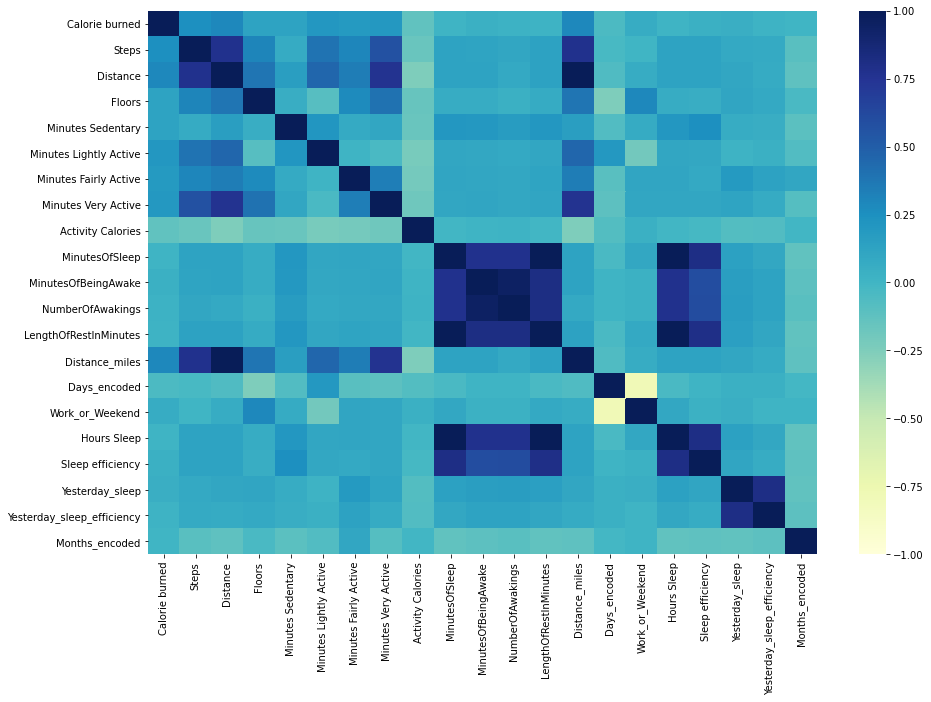

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),vmin= -1, vmax= 1, cmap="YlGnBu")

In [29]:
# another color option 
# sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap = 'RdYlGn')

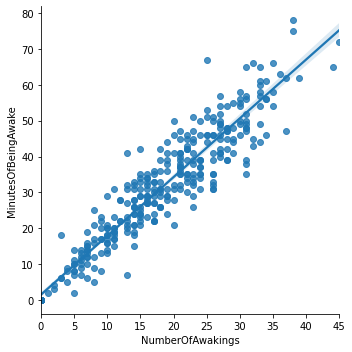

In [30]:
# Step 2.
sns.lmplot(data=data, x='NumberOfAwakings', y='MinutesOfBeingAwake')

In [31]:
# Step 3:

X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
X = sm.add_constant(X)

In [32]:
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         19:55:16   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Y = b0 + b1 * X
# [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]
# [MinutesOfBeingAwake] = 1.4381 + 1.6405*[NumberOfAwakings]
# NumberOfAwakings = 5
# MinutesOfBeingAwake = 1.4381 + 1.6405 * 5 = 9.64
# NumberOfAwakings = 6
# MinutesOfBeingAwake = 1.4381 + 1.6405 * 6 = 11.28
# interpretation of b1: if we change X by one unit, Y changes by b1 = 1.6405 units!

Now look at multiple X variables!

Multiple Linear Regression:

In [34]:
#[MinutesOfBeingAwake]

In [35]:
X = data[['NumberOfAwakings',  'Distance_miles']]
Y = data['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     1794.
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):          3.22e-189
Time:                         19:55:16   Log-Likelihood:                -1154.3
No. Observations:                  367   AIC:                             2315.
Df Residuals:                      364   BIC:                             2326.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5001      0.881     -0.567      0.571      -2.233       1.233
NumberOfAwakings     1.6336      0.028     59.332      0.000       1.579       1.688
Distance_miles       0.3860      0.140      2.761      0.006       0.111       0.661
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.472
Skew:                           0.270   Prob(JB):                     8.89e-08
Kurtosis:                       4.353   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Y = b0 + b1*X + b2*X
# [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings] + b2*[Distance_miles]
# [MinutesOfBeingAwake] = -.5001 + 1.6336*[NumberOfAwakings] + 0.3860*[Distance_miles]
# interpretation of coefficients stays the same!


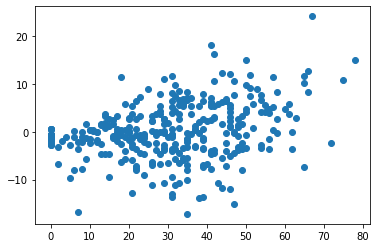

In [37]:
Y_pred = results.predict(X)
residuals = Y - Y_pred
plt.scatter(Y, residuals)

Note:
In multiple regression, coefficients represent:
*ceteris paribus* 
(or if all else remains constant...)

### Estimate OLS parameters using scipy.stats

### Binary Variables: (week 12 class)

In [38]:
data['Work_or_Weekend'] # BINARY!

0      1
1      0
2      0
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    0
Name: Work_or_Weekend, Length: 367, dtype: int64

In [39]:
X = data[['Work_or_Weekend']]
Y = data['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# Look at a regression summary for a binary variable as x
# we can see that the p-value is way larger than 0.05, the R2 value is huge, the adjusted R2 is negative for one single variable,
# and 0 falls within the confidence interval!

# THUS, this variable makes your model crap. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.5292
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):              0.467
Time:                         19:57:40   Log-Likelihood:                -1591.6
No. Observations:                  367   AIC:                             3187.
Df Residuals:                      365   BIC:                             3195.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.8952      1.811     14.854      0.000      23.335      30.456
Work_or_Weekend     1.5590      2.143      0.727      0.467      -2.655       5.773
==============================================================================
Omnibus:                       24.581   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.338
Skew:                           0.058   Prob(JB):                      0.00938
Kurtosis:                       2.227   Cond. No.                         3.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
data['Sleep efficiency'] # continuous, ranges from 0-100.

0      92.086331
1      92.464358
2      88.761468
3      88.857143
4      82.892057
         ...    
362    91.951220
363    95.081967
364    88.888889
365    89.805825
366    89.165187
Name: Sleep efficiency, Length: 367, dtype: float64

In [41]:
# we define: efficient sleep is a value above 90.
# if below 90, not efficient. 
# if above 90, efficient!
# Make a binary variable and add it to the df:

In [43]:
X = np.where(data['Sleep efficiency']>90, 1, 0)
X
# Look up the np.where condition where you can either assign it the value of 1 or 0 depending on whether the condition is met or not.

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [44]:
X = pd.DataFrame()
X['EfficientSleep'] = np.where(data['Sleep efficiency']>90, 1, 0)
# note, if you define a new variable in the data frame, it is easier to interpret the results with a new coeffient!!
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.029
Model:                             OLS   Adj. R-squared:                  0.026
Method:                  Least Squares   F-statistic:                     10.72
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):            0.00116
Time:                         20:04:47   Log-Likelihood:                -1586.6
No. Observations:                  367   AIC:                             3177.
Df Residuals:                      365   BIC:                             3185.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             30.9137      1.304     23.710      0.000      28.350      33.478
EfficientSleep    -6.2725      1.916     -3.274      0.001     -10.040      -2.505
==============================================================================
Omnibus:                       17.383   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.279
Skew:                          -0.251   Prob(JB):                      0.00586
Kurtosis:                       2.351   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Categorical Data:

In [46]:
# Days:
data['Days'].value_counts()

Friday       54
Saturday     53
Monday       52
Tuesday      52
Sunday       52
Thursday     52
Wednesday    52
Name: Days, dtype: int64

In [48]:
data['Days']

0         Friday
1       Saturday
2         Sunday
3         Monday
4        Tuesday
         ...    
362      Tuesday
363    Wednesday
364     Thursday
365       Friday
366     Saturday
Name: Days, Length: 367, dtype: object

In [47]:
pd.get_dummies(data['Days'])
# function built into pandas!

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
362,0,0,0,0,0,1,0
363,0,0,0,0,0,0,1
364,0,0,0,0,1,0,0
365,1,0,0,0,0,0,0


In [49]:
X = pd.get_dummies(data['Days'], drop_first = True)
# REMEMBER that when creating dummy variables, you ALWAYS need to drop_first!
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.8900
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):              0.502
Time:                         20:27:54   Log-Likelihood:                -1589.2
No. Observations:                  367   AIC:                             3192.
Df Residuals:                      360   BIC:                             3220.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0370      2.525     11.102      0.000      23.071      33.004
Monday        -2.4793      3.606     -0.688      0.492      -9.570       4.612
Saturday      -1.3767      3.588     -0.384      0.701      -8.433       5.680
Sunday        -0.9024      3.606     -0.250      0.803      -7.993       6.188
Thursday       4.9630      3.606      1.376      0.170      -2.128      12.054
Tuesday       -1.1332      3.606     -0.314      0.753      -8.224       5.958
Wednesday      0.7514      3.606      0.208      0.835      -6.339       7.842
==============================================================================
Omnibus:                       25.696   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.589
Skew:                           0.062   Prob(JB):                      0.00827
Kurtosis:                       2.218   Cond. No.                         7.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Logistic Regression

In [50]:
Y = np.where(data['Sleep efficiency']>90, 1, 0)
X = data['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.Logit(Y, X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.676012
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  367
Model:                          Logit   Df Residuals:                      365
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                 0.02089
Time:                        20:35:35   Log-Likelihood:                -248.10
converged:                       True   LL-Null:                       -253.39
Covariance Type:            nonrobust   LLR p-value:                  0.001138
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3719      0.193      1.930      0.054      -0.006       0.750
MinutesOfBeingAwake    -0.0187      0.006     -3.202      0.001      -0.030      -0.007
=======================================================================================
"""

In [51]:
# Interpret DIRECTION!
# what is the chance of getting a yes or no?
# this shows us that people who spend more time being awake ...
# have a LOWER chance of being sleep efficient.
# Lower because coefficient is negative.

In [52]:
Y = np.where(data['Sleep efficiency']>90, 1, 0)
X = data['NumberOfAwakings']
X = sm.add_constant(X)
model = sm.Logit(Y, X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.685432
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  367
Model:                          Logit   Df Residuals:                      365
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                0.007251
Time:                        20:37:56   Log-Likelihood:                -251.55
converged:                       True   LL-Null:                       -253.39
Covariance Type:            nonrobust   LLR p-value:                   0.05525
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1553      0.190      0.818      0.413      -0.217       0.527
NumberOfAwakings    -0.0188      0.010     -1.907      0.057      -0.038       0.001
====================================================================================
"""

In [53]:
# same as above, just look at the sign of the coefficient!
# The higher the # of awaking, the lower the chance that the person is sleep efficient!


In [56]:
results.predict(X)

# will return the PROBABILITY of sleeping efficiently!
# if above 0.5, more than 50% chance of sleeping efficient; tend toward YES
# if below 0.5, less than 50% chance of sleeping efficient; tend toward NO 

0      0.431260
1      0.440497
2      0.422072
3      0.440497
4      0.338244
         ...   
362    0.454427
363    0.501255
364    0.468428
365    0.435873
366    0.394851
Length: 367, dtype: float64